# STOR 535: Lab2
### Submit the PDF version of this homework to gradescope by Feb 18

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

### Simply run the following python script to obtain ``data``.

In [2]:
np.random.seed(42) 
num_flips = 10000

data = np.random.choice([0,1], size=num_flips, p = [0.3, 0.7])

### 1. Explain in words what the meaning of the above python code? (10 points)

Setting the random seed to 42 allows us to obtain the same result each time. This is helpful when we are trying to obtain insights and maintain consistency within experiment/empirical data.
We initialize a vaariable num_flips to integer 10000, and then create data, which create a numpy array of 1000 entries of zeros and ones. These zeros and ones are randomly generated, with 0 having a probability of 0.30 to be chosen for any given index, and 1 having a probability of 0.70 to be chosen for any given index.

### 2. Given the vector `data`, print the first 10 elements. Then, explain the meaning of data in the context of flipping a coin. Specifically, describe what each element represents. (5 points)

In [3]:
data[:10]

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In context of a coin, if we make 1 = to a flip resulting in heads, and 0 = to a flip resulting in tails, we have rolled 7 heads and 3 tails. while this is uneven, this makes sense because we set the probability of 0 to 0.30 and 1 to 0.70. With 10 random rolls, we expect on average 3 0s and 7 1s. 

### 3. Use Python to calculate the probability of obtaining the same sequence of outcomes as the first 10 elements in `data` when flipping a fair coin. You can assume that 1 represent head up and 0 represent tail up. Print the probability. (10 points)

Hint: The order of outcome matters.

In [4]:
probability = .5**10
probability

0.0009765625

### 4. Use Python to calculate the probability of obtaining the same sequence of outcomes as the first 10 elements in `data` when flipping an unfair coin with head up probability 0.7. Print the probability. (5 points)

Hint: The order of outcome matters.

In [5]:
probability = .7**7 * .3**3
probability

0.002223566099999999

### 5. Suppoe that we have 9 coins in a box. Each coin appears identical, but the $i$th coin has probability of landing heads $p_i = 0.1 \times i$ for  $i = 1, 2, \ldots, 9$. We randomly draw one coin from the box (each coin equally likely), then flip it 10,000 times. Let the vector ``data`` in the above question be the outcome.

#### 5.1 Before we flip the coin, what is the prior probability of selecting each type of coin? Visualize this in a bar plot, where the y-axis represents the prior probability, and x-axis represents each type of coin. (10 points)

Text(0, 0.5, 'Prior Probability to be Selected')

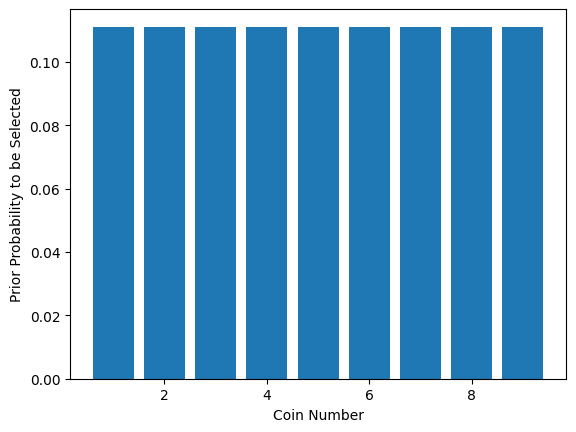

In [6]:
# array named coins of size 9 with value of 1/9
coins = np.arange(1, 10) # 1 to 9
p_chosen = np.full(9, 1/9) # P(Coin i)
prob = np.zeros(9) # P(Heads | Coin i)
for i in range(1,10): 
    prob[i-1] = 0.1 * i

plt.bar(coins, p_chosen)
plt.xlabel('Coin Number')
plt.ylabel('Prior Probability to be Selected')

#### 5.2 After we observe the outcome of the first flip in ``data``, what is the posterior probability of coin type? Visualize this in a bar plot. (10 points)

[0.02222222 0.04444444 0.06666667 0.08888889 0.11111111 0.13333333
 0.15555556 0.17777778 0.2       ]


Text(0, 0.5, 'Posterior Probability to be Selected After Heads 1')

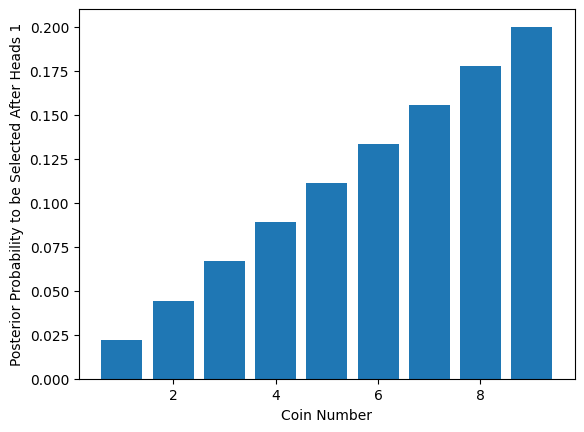

In [7]:
# First roll is heads
p_heads = np.sum(prob*p_chosen)

post1_prob = np.zeros(9)
for i in range(9):
    post1_prob[i] = prob[i] * p_chosen[i] / p_heads
    
plt.bar(coins, post1_prob)
print(post1_prob)
plt.xlabel('Coin Number')
plt.ylabel('Posterior Probability to be Selected After Heads 1')

#### 5.3 After we observe the outcome of the first two flips in ``data``, what is the posterior probability of coin type? Visualize this in a bar plot. (10 points)

[0.00350877 0.01403509 0.03157895 0.05614035 0.0877193  0.12631579
 0.17192982 0.2245614  0.28421053]


Text(0, 0.5, 'Posterior Probability to be Selected After Heads 2')

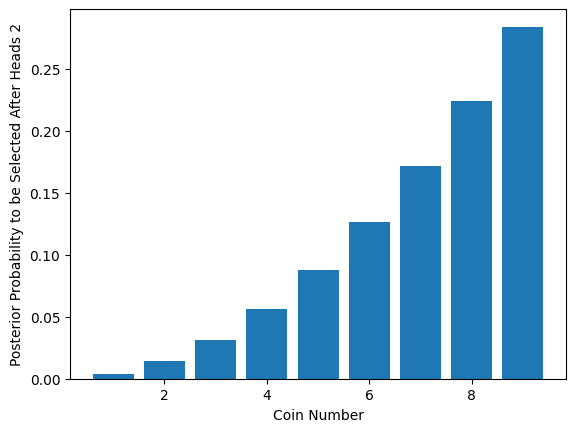

In [8]:
# Second roll is also heads
p_heads2 = np.sum(prob*post1_prob)
post2_prob = np.zeros(9)
for i in range(9):
    post2_prob[i] = prob[i] * post1_prob[i] / p_heads2

print(post2_prob)
    
plt.bar(coins, post2_prob)
plt.xlabel('Coin Number')
plt.ylabel('Posterior Probability to be Selected After Heads 2')

#### 5.4 Define a function called `compute_posterior()` to calculate the posterior probability of these 9 types of coin. The input parameters of the function include:

* A vector of prior probability of each coin.
* A vector of observed sequence of coin flips.
* A vector of head-up probability of each type of coin. (10 points)

In [9]:
def compute_posterior(prior, observed, prob):
    heads = np.sum(observed)
    tails = len(observed) - heads
    
    p_flips = (prob**heads) * ((1-prob)**tails)
    p_bottom = np.sum(p_flips*prior) 
    post_prob = p_flips * prior / p_bottom
    
    return post_prob

#### 5.5 Use the function `compute_posterior()` to calculate the posterior probability after observing the first 1,2,3,4,5,10, 50, 100, 500, and 1000 flip outcomes in `data`. Print the posterior probability for each case. (10 points)

In [10]:
x = [1,2,3,4,5,10,50,100,500,1000]
coin_prob = p_chosen
heads_prob = prob
for i in x:
    flips = data[:i]
    post_prob = compute_posterior(coin_prob, flips, heads_prob)
    print(f"Posterior Probability after {i} flips: {post_prob}")

Posterior Probability after 1 flips: [0.02222222 0.04444444 0.06666667 0.08888889 0.11111111 0.13333333
 0.15555556 0.17777778 0.2       ]
Posterior Probability after 2 flips: [0.00350877 0.01403509 0.03157895 0.05614035 0.0877193  0.12631579
 0.17192982 0.2245614  0.28421053]
Posterior Probability after 3 flips: [0.00049383 0.00395062 0.01333333 0.03160494 0.0617284  0.10666667
 0.16938272 0.25283951 0.36      ]
Posterior Probability after 4 flips: [6.52188091e-05 1.04350095e-03 5.28272354e-03 1.66960151e-02
 4.07617557e-02 8.45235766e-02 1.56590361e-01 2.67136242e-01
 4.27900607e-01]
Posterior Probability after 5 flips: [0.00027688 0.00393786 0.01744347 0.04725427 0.09613906 0.15948316
 0.22159668 0.25202277 0.20184587]
Posterior Probability after 10 flips: [9.61326393e-06 8.64217922e-04 9.89204858e-03 4.66677678e-02
 1.28778506e-01 2.36255574e-01 2.93219860e-01 2.21239788e-01
 6.30726246e-02]
Posterior Probability after 50 flips: [2.09494787e-18 4.79960126e-10 1.09191089e-05 4.35811

#### 5.6 Create 10 separate bar plots that visualize the posterior probability of each type of coin, given 1,2,3,4,5,10, 50, 100, 500, and 1000 flip outcomes in `data`, respectively. What do you observe? (10 points)

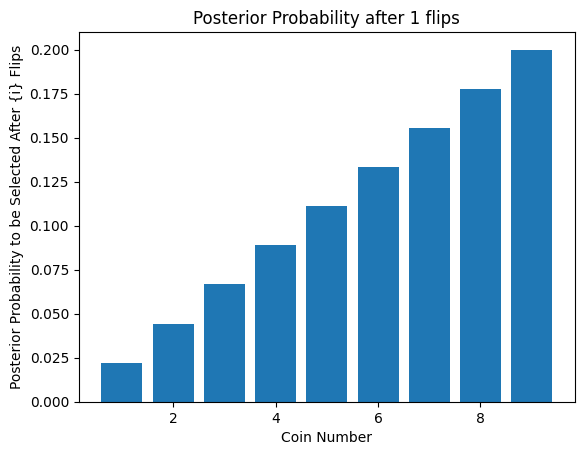

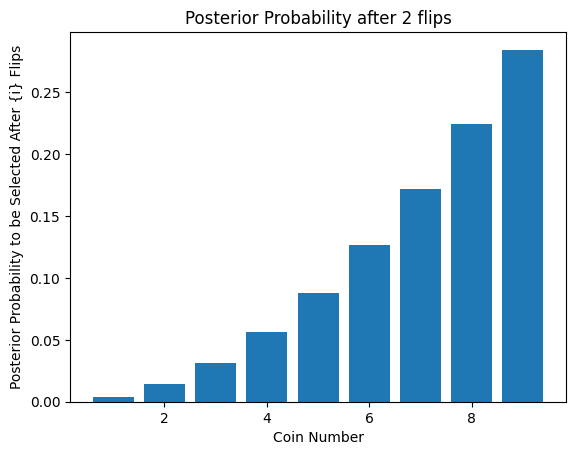

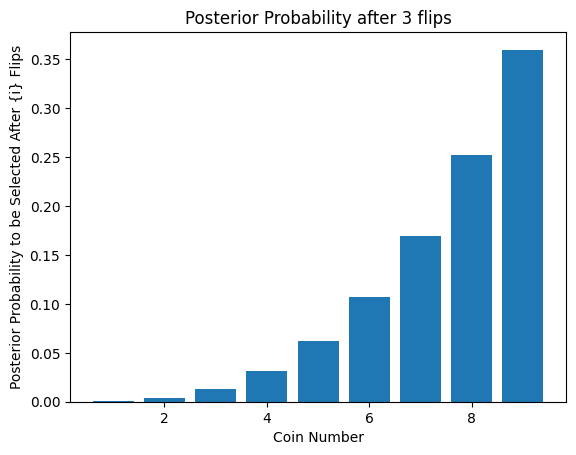

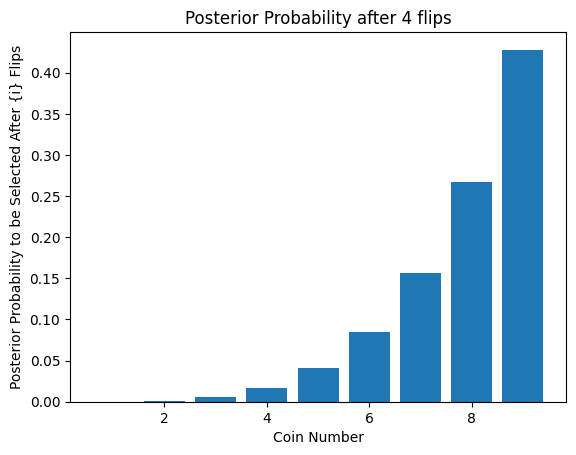

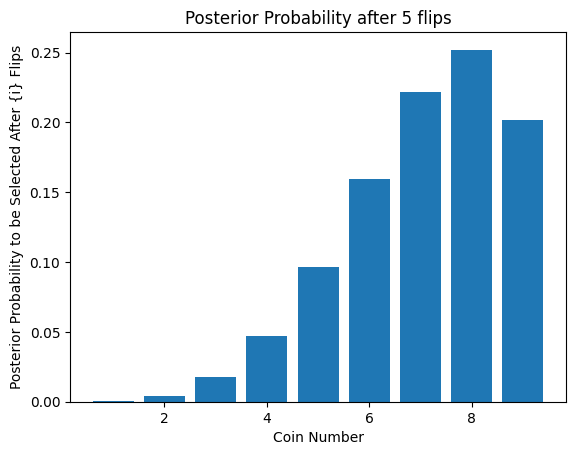

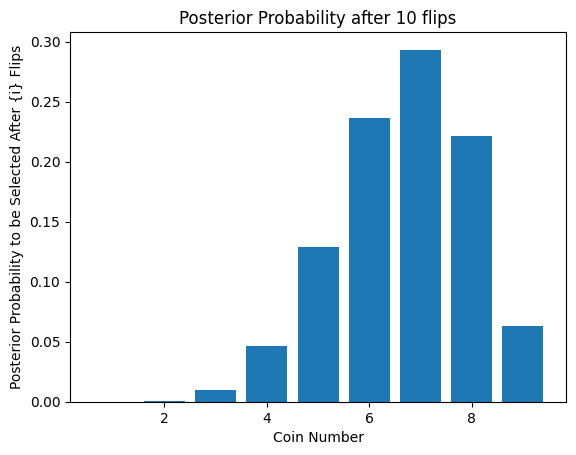

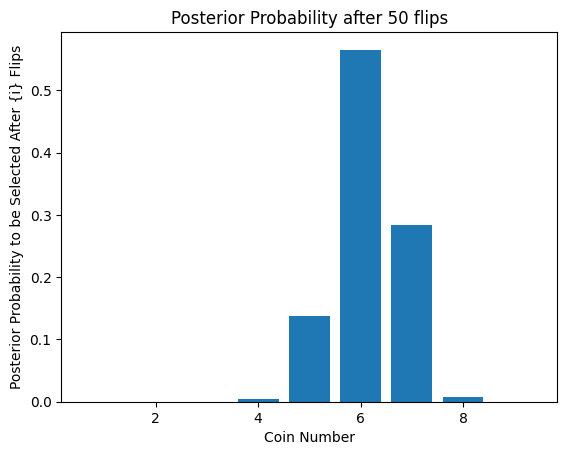

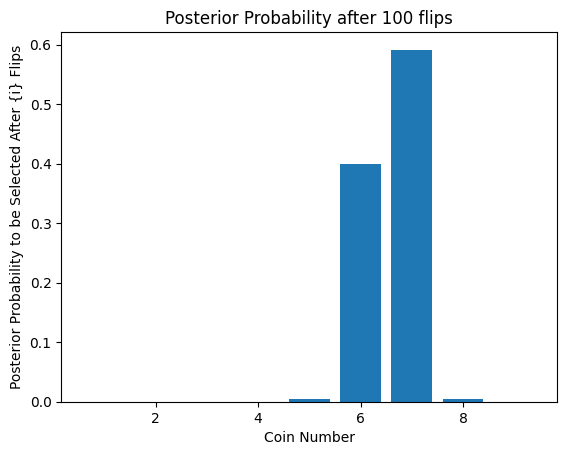

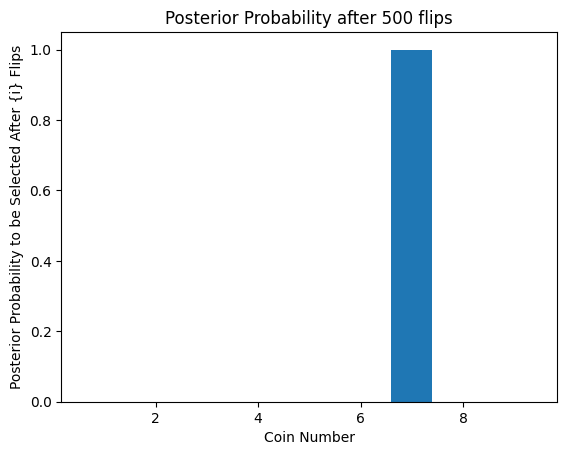

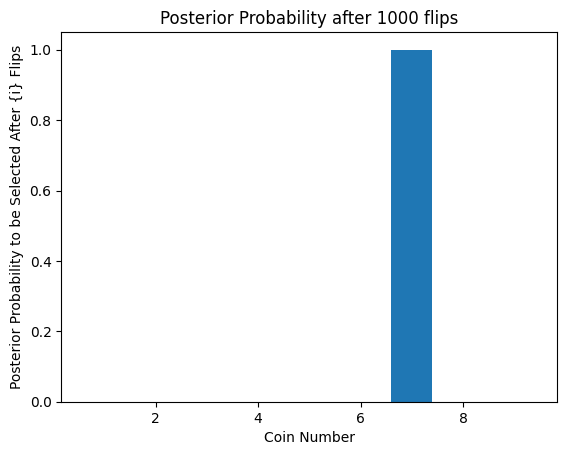

In [11]:
for i in x:
    plt.figure(i)
    plt.bar(coins, compute_posterior(coin_prob, data[:i], heads_prob))
    plt.title(f'Posterior Probability after {i} flips')
    plt.xlabel('Coin Number')
    plt.ylabel('Posterior Probability to be Selected After {i} Flips')

As we increase the number of flips, the probability of selecting coin 7 eventually greatly outweights the rest of the coins. This is due to the fact that we set the probability of getting a heads to 0.7, and coin #7 has a probability of 0.7 to flip to heads. Since the coin from the data and coin #7 both have a probaiblity of 0.70 to flip to heads, it is natural that the distribution gravitates towards coin #7 as the number of flips grows larger. 

### 5.7 Repeat 5.5 and 5.6 again using `data`, but now the prior probability for each type coin is `[0.05,0.6, 0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]`. In other words, initially, Type 2 coin has a much higher probability of being chosen. What do you observe?  (10 points)

In [12]:
x = [1,2,3,4,5,10,50,100,500,1000]
coin_prob = [0.05, 0.6, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
heads_prob = prob
for i in x:
    flips = data[:i]
    post_prob = compute_posterior(coin_prob, flips, heads_prob)
    print(f"Posterior Probability after {i} flips: {post_prob}")

Posterior Probability after 1 flips: [0.01492537 0.35820896 0.04477612 0.05970149 0.07462687 0.08955224
 0.10447761 0.11940299 0.13432836]
Posterior Probability after 2 flips: [0.00303951 0.14589666 0.02735562 0.04863222 0.07598784 0.10942249
 0.14893617 0.19452888 0.24620061]
Posterior Probability after 3 flips: [0.00047326 0.04543303 0.01277804 0.03028869 0.0591576  0.10222433
 0.16232844 0.24230951 0.3450071 ]
Posterior Probability after 4 flips: [6.44786898e-05 1.23799084e-02 5.22277387e-03 1.65065446e-02
 4.02991811e-02 8.35643820e-02 1.54813334e-01 2.64104713e-01
 4.23044684e-01]
Posterior Probability after 5 flips: [0.00026538 0.04529237 0.01671925 0.04529237 0.09214755 0.15286173
 0.21239643 0.24155928 0.19346563]
Posterior Probability after 10 flips: [9.52273701e-06 1.02729563e-02 9.79889638e-03 4.62283032e-02
 1.27565814e-01 2.34030785e-01 2.90458645e-01 2.19156400e-01
 6.24786775e-02]
Posterior Probability after 50 flips: [2.09494785e-18 5.75952148e-09 1.09191088e-05 4.35811

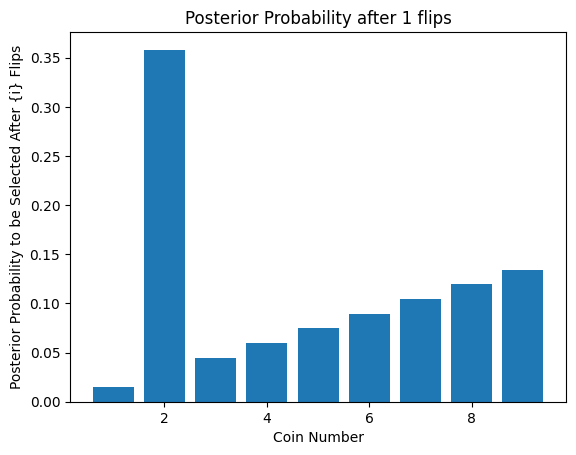

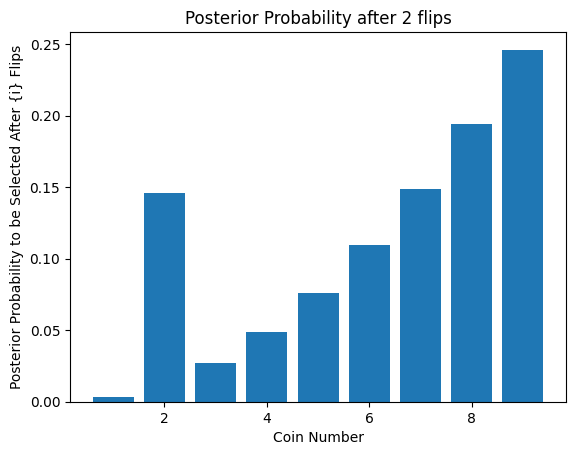

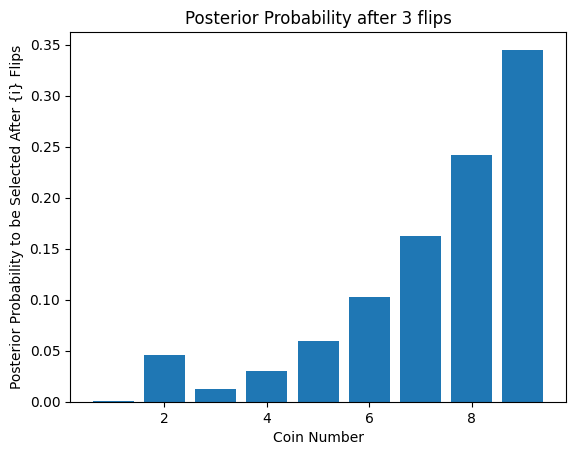

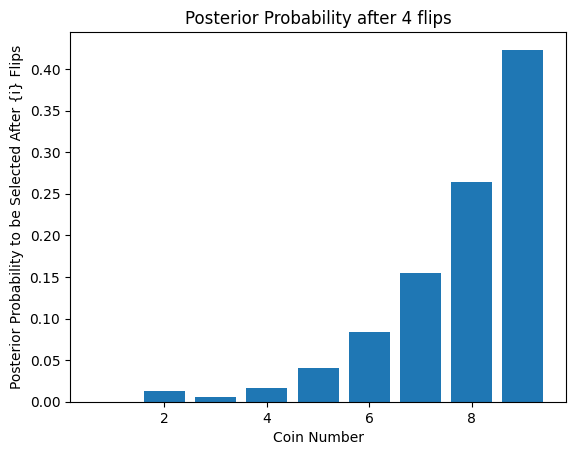

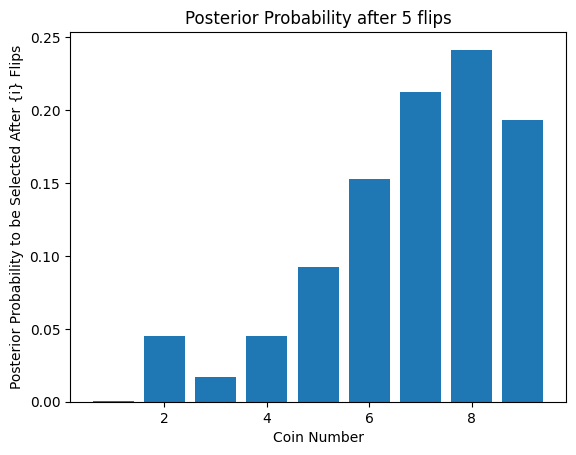

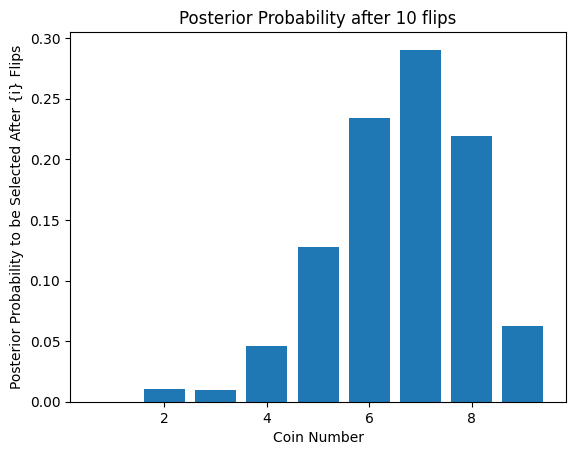

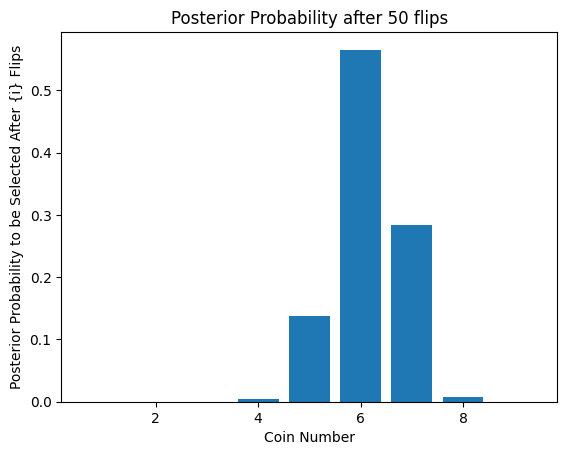

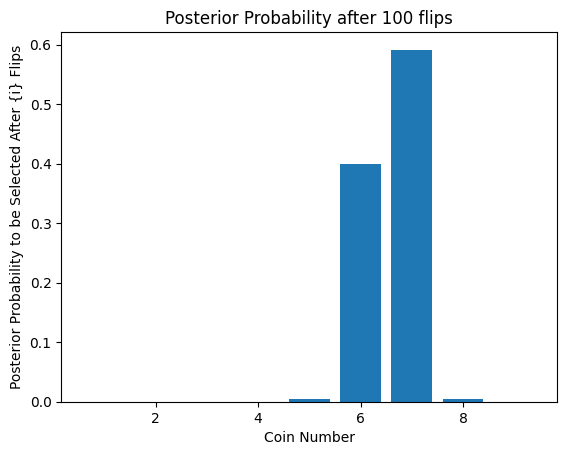

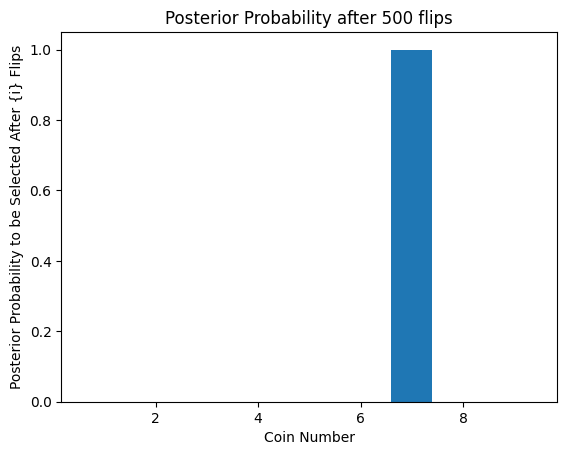

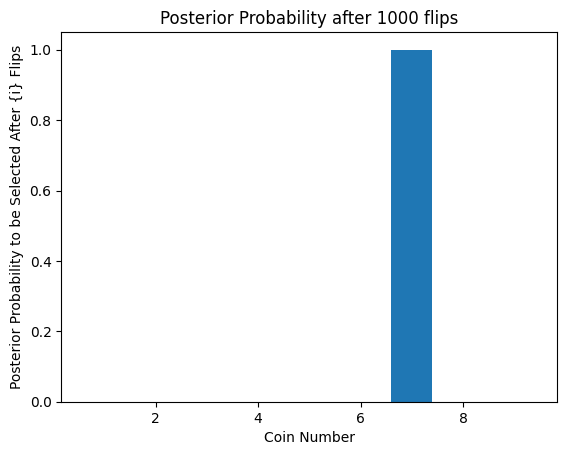

In [13]:
for i in x:
    plt.figure(i)
    plt.bar(coins, compute_posterior(coin_prob, data[:i], prob))
    plt.title(f'Posterior Probability after {i} flips')
    plt.xlabel('Coin Number')
    plt.ylabel('Posterior Probability to be Selected After {i} Flips')

Coin #2 stays relevant for longer, as the coins around it shrink in probability of being chosen. However, since the coins still retain their previous probabilities of flipping to heads, and the data does not change, the distribution still gravitates towards coin #7 with enough flips. 